In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt

# 6.1: The Double-Sideband Mixer (DSB Mixer)

In [30]:
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=1000)
np.savetxt('data_21', x)

In [29]:
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=1000)
np.savetxt('data_19', x)

## Power Spectra for DSB Mixer Data

In [2]:
def PS(testFile):
    myFile = np.loadtxt(testFile)
    Vsamp = 62.5
    N = 800

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    f,fx = ugradio.dft.dft(myFile[:N],t=time, vsamp=Vsamp)
    P = np.abs(fx)**2
    plt.plot(f,P)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()

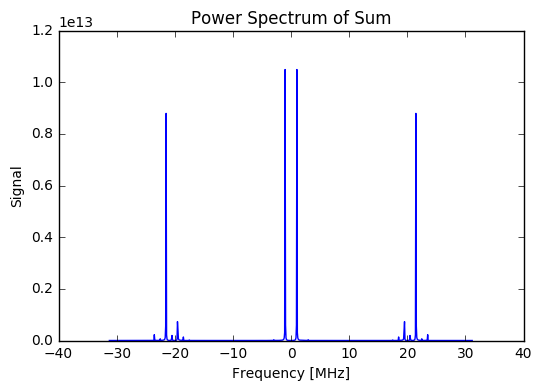

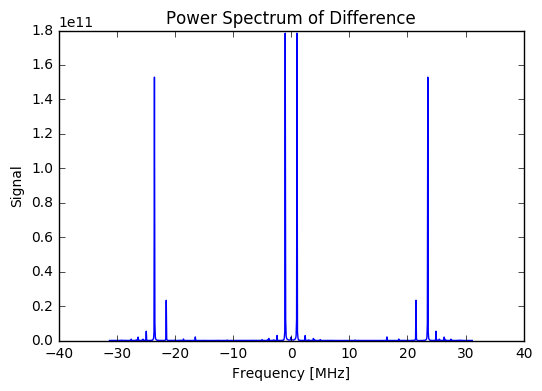

In [4]:
plt.title('Power Spectrum of Sum') 
PS('data_21')

plt.title('Power Spectrum of Difference')
PS('data_19')

## Waveforms of DSB Data

In [ ]:
def Wave(file,Vsig):
    
    Vsamp = 62.5 #MHz
    N = 512
    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    print('Vsig = {}{}'.format(Vsig, 'MHz'))
    file9 = np.loadtxt(file)
    
    plt.subplot(3,1,1)
    
    
    #time domain signal - plot digitally sampled waveform vs time
    plt.plot(time[N/2:N/2 + 21],file9[N/2:N/2 + 21],'k.-')
    
    plt.xlabel("Time [micro sec]")
    plt.ylabel("Signal")
    plt.show()

Vsig = 21MHz


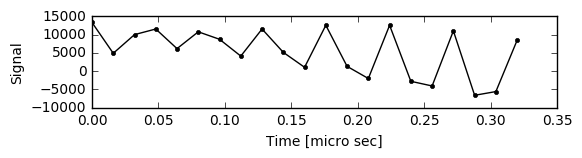

Vsig = 19MHz


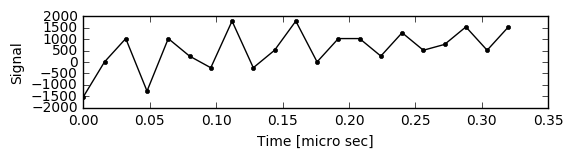

In [11]:
plt.title('Waveform of Sum')  
Wave('data_21', Vsig = 21)

plt.title('Waveform of Difference')
Wave('data_19', Vsig = 19)

# 6.3: The Sideband-Separating Mixer (SSB Mixer)

## 6.3.1: As a DSB Mixer

In [10]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_20_nd', x)

In [14]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_30_nd', x)

In [26]:
def PS_(x):
    Vsamp = 62.5
    N = 1000

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies
    f,fx = ugradio.dft.dft(x[:N], f=f_input, vsamp=Vsamp)
    P = np.abs(fx)**2

    plt.plot(f,P)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()

### Difference Frequencies with Small Delay

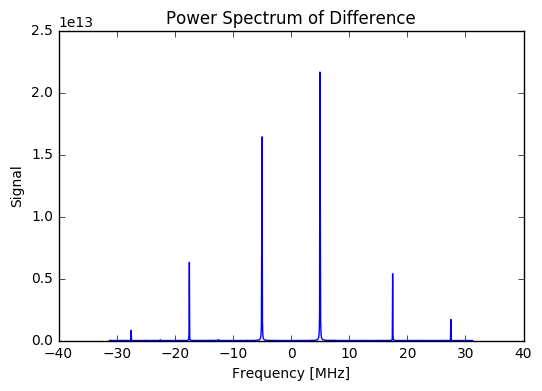

In [31]:
x = np.loadtxt('data_20_nd')
a = x[:len(x)//2]
b = x[len(x)//2:]
c = a + b * 1j

plt.title('Power Spectrum of Difference')
PS_(c)

### Sum Frequencies with Small Delay

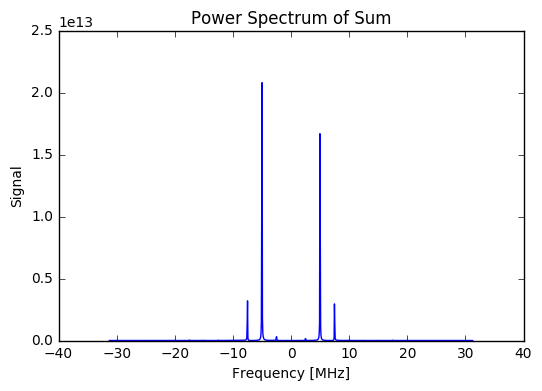

In [28]:
x = np.loadtxt('data_30_nd')
a = x[:len(x)//2]
b = x[len(x)//2:]
c = a + b * 1j

plt.title('Power Spectrum of Sum')
PS_(c)

## 6.3.2: The SSB Mixer

In [15]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_20_d', x)

In [16]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_30_d', x)

### Difference Frequencies with Delay

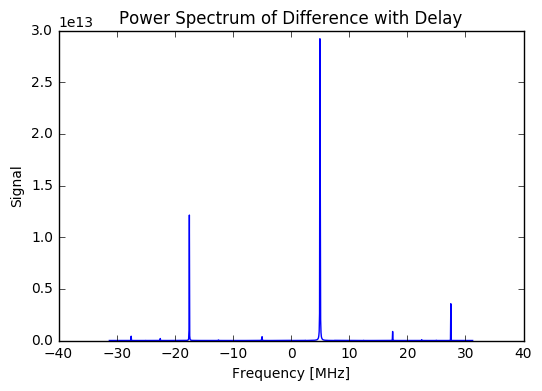

In [29]:
x = np.loadtxt('data_20_d')
a = x[:len(x)//2]
b = x[len(x)//2:]
c = a + b * 1j

plt.title('Power Spectrum of Difference with Delay')
PS_(c)

### Sum Frequencies with Delay

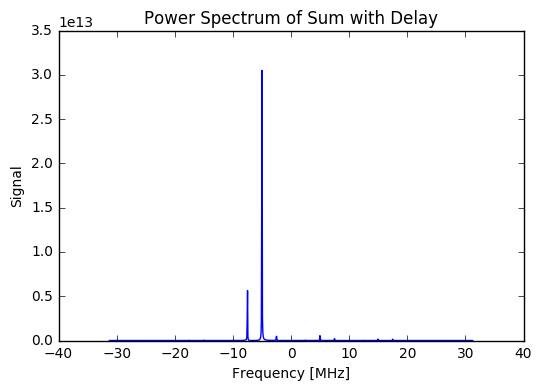

In [30]:
x = np.loadtxt('data_30_d')
a = x[:len(x)//2]
b = x[len(x)//2:]
c = a + b * 1j

plt.title('Power Spectrum of Sum with Delay')
PS_(c)